# Trabajo Aprendizaje automático I
### <font color=green>*Máster en Informática Industrial y Robótica*</font>

#### Nombre y apellidos:
#### Domingo Capelo Luces
#### Iraisy Carolina Figueroa Silva

#### En este trabajo vamos a estudiar...

### PASO 1 :
### TRATAMIENTO DE DATOS: 
#### Partiendo de nuestro grupo de imagenes .jpg tenemos que generar el grupo de datos de entrada y salida de nuestro modelo.
#### Para poder tratar las images usaremos las siguientes librerias:
### - LIBRERÍA CV2
#### Nos permite convertir jpg ---> Array Bytes
#### Syntax: cv2.imread(path, flag)
#### path: ruta con formato "string" en la que se encuentra la imagen a leer.
#### flag: especifica el formato de color en el que se leerá la imagen.
#### flag=0 blanco y negro
#### flag=1 color
### - LIBRERÍA fnmatch y os
#### Nos permiten buscar archivos dentro de una carpeta mediante su ruta (path).
#### Teniendo en cuenta esto, para encontrar un archivo lo único que necesitaremos es su ruta.

## Importamos librerías
#### Si falta alguna por instalar:
#### cv2 ----> python -m pip install opencv-python

In [2]:
import cv2
import fnmatch
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, precision_score, plot_confusion_matrix, classification_report
import sklearn.neural_network
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from tensorflow.keras import datasets, layers, models
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

print('Done')

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Done


## Funcion: List_name_files(path, l)
#### Nos devuelve una lista con los nombres de los archivos que se encuentran en la carpeta.

In [4]:
def List_name_files(path, l):
    try:
        l = []
        for item in os.listdir(path):
            l.append(item)
    except:
        print("Error in funtion : list_name_files(path, l)")
        l = []
    return l
print('Done')

Done


#### Ejemplo de uso:
#### Guardamos los nombres de todos los archivos en nuetra carpeta de Data Images

In [5]:
# Ruta
PathData="dataset/Data Images"
# Lista vacias
L_nameDataImag = []
L_nameDataImag = List_name_files(PathData, L_nameDataImag)
for i in range(5): #Ejemplo imprimiendo 5 nombres Train
    print("Imagen "+str(i)+": "+L_nameDataImag[i])
print('Done')

Imagen 0: image8799.jpg
Imagen 1: image9487.jpg
Imagen 2: image1965.jpg
Imagen 3: image4809.jpg
Imagen 4: image6978.jpg
Done


## Funcion: List_Array_RGB(path, l)
#### Devuelve una lista que representa el array de píxeles de cada imagen.

In [6]:
def List_Array_RGB(path, l):
    try:
        l = []
        for item in os.listdir(path):
            p = path + "/" + str(item)
            l.append(cv2.imread(p, flags=1))
    except:
        print("Error in funtion : list_name_files(path, l)")
        l = []
    return l
print('Done')

Done


#### Ejemplo de uso:
#### Guardamos en la lista L_RGBData, las matrices de pixeles de cada imagen. 

In [7]:
#Lista vacia
L_RGBData = []
L_RGBData = List_Array_RGB(PathData, L_RGBData)
for i in range(5):  #Ejemplo imprimiendo 5 Arrays
    print(str(L_nameDataImag[i])+"--> pixels:"+str(L_RGBData[i].shape))

image8799.jpg--> pixels:(56, 80, 3)
image9487.jpg--> pixels:(107, 80, 3)
image1965.jpg--> pixels:(60, 80, 3)
image4809.jpg--> pixels:(106, 80, 3)
image6978.jpg--> pixels:(123, 80, 3)


## Redimensión 64x64
#### Como vemos anteriormente las imagenes no tienen el mismo tamaño, por lo que para trabajar con ellas las redimensionaremos todas con el mismo tamaño, en este caso elegimos redimensionarlas como : 64x64

## Funcion: Redim(pathImage,pathSave,listnames,D1,D2):
#### Redimensiona las imagenes que se encuentren en una carpeta determina y las guarda en otra ruta con el mismo nombre.
#### pathImage: Ruta en la que se encuentran las imagenes sin redimensionar.
#### pathSave: Ruta en la que queremos guardar las imagenes redimensionadas.
#### D1: Dimensión 1 en pixeles
#### D2: Dimensión 2 en pixeles

In [8]:
def Redim(pathImage,pathSave,D1,D2):
    try:
        for item in os.listdir(pathImage):
            path = pathImage + "/" + str(item)
            img = Image.open(path)
            new_imag = img.resize((D1, D2))
            pathsave_=pathSave + "/" + str(item)
            new_imag.save(pathsave_)
    except:
        print("Error in funtion : Redim(pathImage,pathSave,listnames,D1,D2):")
print('Done')

Done


#### Ejemplo de uso:
#### Redimensionar las imágenes y las guardamos en la carpeta Data_Images64x64

In [9]:
PathData_64x64="dataset/Data_Images64x64"
Redim(PathData,PathData_64x64,64,64)
print('Done')

Done


#### Ahora que tenemos las imagenes redimensionadas, con el uso de la función explicada anteriormente "List_Array_RGB", guardaremos la lista de imágenes redimesionadas.

In [10]:
L_RGBData_64x64 = []
L_RGBData_64x64 = List_Array_RGB(PathData_64x64, L_RGBData_64x64)
for i in range(5):  #Ejemplo imprimiendo 5 Arrays
    print(str(L_nameDataImag[i])+"--> pixels redim: "+str(L_RGBData_64x64[i].shape))

image8799.jpg--> pixels redim: (64, 64, 3)
image9487.jpg--> pixels redim: (64, 64, 3)
image1965.jpg--> pixels redim: (64, 64, 3)
image4809.jpg--> pixels redim: (64, 64, 3)
image6978.jpg--> pixels redim: (64, 64, 3)


## Función: Plot_Imagenes(StrTitulo,ListaTitulo,ListaImg,NumImg):
#### Grafica n imágenes con sus respectivos títulos
#### StrTitulo: String que se quiera poner poner como título genérico
#### ListaTitulo: Si tenemos una Lista con nombres.
#### ListaImg: Lista de imágenes a imprimir
#### NumImg : Número de gráficas a mostrar

In [11]:
def Plot_Imagenes(StrTitulo,ListaTitulo,ListaImg,NumImg):
    _, axes = plt.subplots(nrows=1, ncols=NumImg, figsize=(12, 8))  # Crea una figura con 1x5 subplots
    i=0
    for ax in axes: # Imprimos las 5 primeras imagen
        ax.set_axis_off()
        #Titulo L_nameTrainImag
        titulo=str(StrTitulo)+str(ListaTitulo[i])
        ax.set_title(titulo)
        #Array imagen L_RGBTrain
        ax.imshow(ListaImg[i],cmap=plt.cm.gray_r)
        i+=1
print('Done')

Done


#### Ejemplo de uso:
#### Comprobamos las diferencias entre la imagen original y la redimensionada.

Done


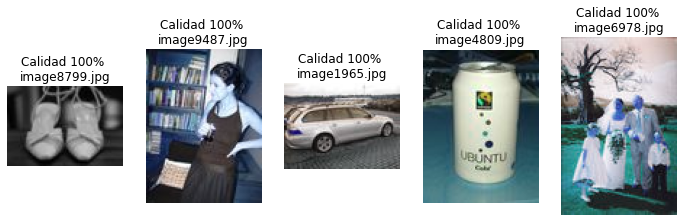

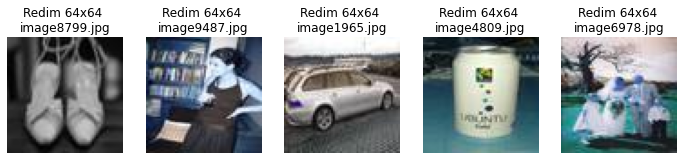

In [12]:
Plot_Imagenes("Calidad 100% \n",L_nameDataImag,L_RGBData,5)
Plot_Imagenes("Redim 64x64 \n",L_nameDataImag,L_RGBData_64x64,5)
print('Done')

#### Cargamos los datos de entrenamiento .csv, mediante el uso de la librería pandas.
#### Representamos los datos en forma de tabla "Nombre imagen" y "clase a la que pertenece"

## Función: CSV_to_RandomTable(path)
#### Devuelve una tabla con los datos ordenados de forma aleatoria
#### path: ruta del archivo .csv

In [13]:
def CSV_to_RandomTable(path):
    try:
        Datos= pd.read_csv(path)
        #Vamos a mezclar los datos para que no tengan ningun orden de prioridad
        n_filas, m_colum=Datos.shape
        Datos=Datos.sample(n=n_filas, random_state=1) #La opción sample permite crear una tabla aleatoria
        return Datos
    except:
        print("Error in funtion : CSV_to_RadomTable(path)")
print('Done')


Done


#### Ejemplo de uso:
#### Cargamos los datos .csv del conjunto de datos, se muestra "nombre imagen" "clase"

In [14]:
# Importar datos
Path_CsvData='dataset/Data.csv'
Datos = CSV_to_RandomTable(Path_CsvData)

# Barajar (opcional)
#Datos = sk.utils.shuffle(Datos)

print(Datos)

               Image                 Class
3159   image4707.jpg                Attire
795    image9827.jpg                  misc
4489   image8322.jpg                  Food
5781   image8426.jpg                  Food
2929   image2346.jpg                Attire
...              ...                   ...
905    image4667.jpg  Decorationandsignage
5192   image2029.jpg                  Food
3980   image7113.jpg                  misc
235   image10833.jpg                  Food
5157   image8858.jpg                Attire

[5983 rows x 2 columns]


## Asociación Entradas Salidas
#### Como vemos en la tabla anterior se asocia el nombre de una imagen con una clase.
#### A nosotros nos interesa que asocie la matriz de píxeles de cada imagen con su clase.
#### Para ello lo primero que haremos sera Guardar los Nombres y las Clases de la tabla anterior en dos listas independientes.

In [15]:
#Nombres Tabla
Data_NameImg=Datos.iloc[:,:-1].values
print("ORDEN DE NOMBRES\n")
print("Tabla.csv")
for i in range(5): #Ejemplo imprimiendo 5 nombres
    print("Indice "+ str(i)+": "+Data_NameImg[i])
print("\nLista Vectores de pixeles")
for i in range(5): #Ejemplo imprimiendo 5 nombres
    print("Indice "+ str(i)+": "+L_nameDataImag[i])

#Clases Tabla
Data_ClaseImg=Datos.iloc[:,1:].values

ORDEN DE NOMBRES

Tabla.csv
['Indice 0: image4707.jpg']
['Indice 1: image9827.jpg']
['Indice 2: image8322.jpg']
['Indice 3: image8426.jpg']
['Indice 4: image2346.jpg']

Lista Vectores de pixeles
Indice 0: image8799.jpg
Indice 1: image9487.jpg
Indice 2: image1965.jpg
Indice 3: image4809.jpg
Indice 4: image6978.jpg


#### Como se puede observar en el print anterior, el orden de la tabla .csv no concuerda con el orden de nuestra lista de imagenes leídas.
#### Por lo que no podemos hacer una asociación directa entre una matriz de píxeles (64,64,3)---->"clase".
#### Tendremos que ordenar la lista primero, para ello la ordenaremos con el orden de la tabla .csv de forma que podamos asociar (64,64,3)---->"clase", esta nueva lista será la lista L_DataOrdenada

## Función: Ordenar_Datos(nombreTabla,ListaNombres,ListaRGB):
#### Devuelve una lista con el orden de nombres especificados en una tabla.csv
#### nombreTabla= nombre de la tabla que condicionará el orden de la lista.
#### ListaNombres= nombres de la lista desordenada.
#### ListaRGB= Lista que se desea ordenar.

In [16]:
def Ordenar_Datos(nombreTabla,ListaNombres,ListaRGB):
    try:
        l=[]
        for i in range(len(nombreTabla)):#Recorro lista de nombres tabla
            if nombreTabla[i] in ListaNombres :#Si existe el nombre de la tabla dentro de nuestra lista de nombres
                indice=ListaNombres.index(nombreTabla[i])#Guardo el indice de ese nombre de nuestra Lista L_nameTrainImag
                l.append(ListaRGB[indice])#Con este indice sabemos el valor del vector respecto a la tabla
    except:
        print("Error in funtion : Ordenar_Datos(nombreTabla,ListaNombres,ListaRGB)")
    return l


In [17]:
L_DataOrdenada=[]
L_DataOrdenada=Ordenar_Datos(Data_NameImg,L_nameDataImag,L_RGBData_64x64)

#### Comprobamos que están bien asociadas nuestras entradas salidas
#### Para ello imprimos las imágenes 5 primeras imagenes que muestra nuestra tabla .csv "hardcodeando ruta" y las comparamos con las 5 primeras imágenes con el nuevo orden.

Image           Class
(64, 64, 3)     ['Attire']
(64, 64, 3)     ['misc']
(64, 64, 3)     ['Food']
(64, 64, 3)     ['Food']
(64, 64, 3)     ['Attire']
(64, 64, 3)     ['Attire']
(64, 64, 3)     ['Decorationandsignage']
(64, 64, 3)     ['Attire']
(64, 64, 3)     ['Food']
(64, 64, 3)     ['misc']


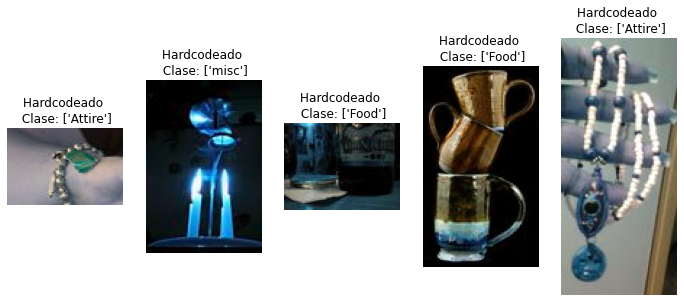

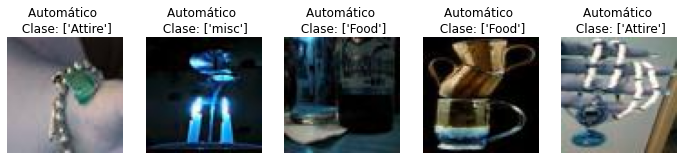

In [18]:
print("Image"+"           "+"Class")
for i in range (10):
    print(str(L_DataOrdenada[i].shape)+"     " +str(Data_ClaseImg[i]))
img0 = cv2.imread("dataset/Data Images/image4707.jpg", flags=1)
img1 = cv2.imread("dataset/Data Images/image9827.jpg", flags=1)
img2 = cv2.imread("dataset/Data Images/image8322.jpg", flags=1)
img3 = cv2.imread("dataset/Data Images/image8426.jpg", flags=1)
img4 = cv2.imread("dataset/Data Images/image2346.jpg", flags=1)
L_Hardcodeado=[img0,img1,img2,img3,img4]
Plot_Imagenes("Hardcodeado \n Clase: ",Data_ClaseImg,L_Hardcodeado,5)
Plot_Imagenes("Automático \n Clase: ",Data_ClaseImg,L_DataOrdenada,5)

## ENTRADAS SALIDAS
#### Como observamos nuestras imágenes ya se encuentran ordenadas según su clase.
#### Procedemos separar las entradas y salidas.

In [19]:
X=[]#Entradas
t=[]#Salidas
X=L_DataOrdenada
t=Data_ClaseImg
t # Es un array de strings

array([['Attire'],
       ['misc'],
       ['Food'],
       ...,
       ['misc'],
       ['Food'],
       ['Attire']], dtype=object)

In [20]:
# Las salidas en t, deben transformarse de string a un valor numérico para facilitarle la tarea a la regresión
Clases=['Food', 'Attire', 'Decorationandsignage', 'misc']
Clases_num = {'Food': 0, 'Attire': 1, 'Decorationandsignage':2, 'misc':3}

# Los datos en texto se transforman en numéricos
t_num = Datos['Class'].map(Clases_num)
for i in range (11):
    print("t"+str(i)+": "+str(t_num[i]))

t0: 0
t1: 3
t2: 1
t3: 0
t4: 1
t5: 3
t6: 0
t7: 0
t8: 0
t9: 0
t10: 1


## Clasificación

#### Para aplicar un clasificador a estos datos, necesitamos aplanar las imágenes, convirtiendo cada matriz 3-D de tamaño ``(64, 64,3)`` en un vector de tamaño ``(12288,)``. Por tanto, todo el conjunto de datos tendrá un tamaño ``(n_samples, n_features)``, donde ``n_samples`` es el número de imágenes y ``n_features`` es el número total de píxeles en cada imagen. Para aplanar los datos se empleará la función [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) de numpy que permite dar una nueva forma a una matriz sin cambiar sus datos:

## Función: From_3D_to_1D(Entrada):

In [21]:
def From_3D_to_1D(Entrada):
    try:
        n_samples = len(Entrada)  #Obtenemos el número de imágenes totales en el conjunto de datos
        X_Train_Matriz=np.array(Entrada) #Convertimos la lista en una matriz para poder trabjar con ella
        data=X_Train_Matriz.reshape(n_samples,-1)
    except:
         print("Error in funtion : From_3D_to_1D(Entrada,)")
         return 0
    return data



In [22]:
X_1D=From_3D_to_1D(X) #Imagenes aplanadas
print("Numero de datos Entrenamiento: "+ str(len(X_1D)))
print("Dimension Imagenes Entrenamiento: "+ str(X[0].shape))
print("Imagenes aplanadas Entrenamiento: "+ str(X_1D.shape))

Numero de datos Entrenamiento: 5983
Dimension Imagenes Entrenamiento: (64, 64, 3)
Imagenes aplanadas Entrenamiento: (5983, 12288)


In [23]:
# Normalizar vector de imágenes a [0..1]
X_1D_norm = X_1D/255
for i in range(15):
    print("X"+str(i)+": "+str(X_1D_norm[i]))

X0: [0.31764706 0.32156863 0.36078431 ... 0.59607843 0.58431373 0.67058824]
X1: [0.         0.         0.         ... 0.00784314 0.01176471 0.        ]
X2: [0.10196078 0.15686275 0.11372549 ... 0.1372549  0.18431373 0.2       ]
X3: [0.         0.         0.01176471 ... 0.         0.         0.        ]
X4: [0.63921569 0.69803922 0.68235294 ... 0.16470588 0.15686275 0.11764706]
X5: [0.02745098 0.         0.02745098 ... 0.10588235 0.17647059 0.77647059]
X6: [0.65490196 0.60784314 0.60784314 ... 0.12941176 0.08627451 0.46666667]
X7: [0.16078431 0.14509804 0.76862745 ... 0.16078431 0.05882353 0.71764706]
X8: [0.17647059 0.42352941 0.80784314 ... 0.41568627 0.51372549 0.40392157]
X9: [0.94117647 0.88627451 1.         ... 0.49019608 0.50196078 0.51764706]
X10: [1.         1.         1.         ... 1.         0.98431373 1.        ]
X11: [0.42352941 0.26666667 0.16862745 ... 0.14509804 0.17647059 0.17647059]
X12: [0.53333333 0.57647059 0.56862745 ... 0.29019608 0.57647059 0.68627451]
X13: [0.0

##  ANÁLISIS NÚMERO DE CLASES

In [24]:
F=0
A=0
D=0
M=0
for i in range(len(t)):
    if(t[i]=='Food'):
        F+=1
    if(t[i]=='Attire'):
        A+=1
    if(t[i]=='Decorationandsignage'):
        D+=1
    if(t[i]=='misc'):
        M+=1
print("Clase '",Clases[0],"' hay",F,"imagenes")
print("Clase '",Clases[1],"' hay",A,"imagenes")
print("Clase '",Clases[2],"' hay",D,"imagenes")
print("Clase '",Clases[3],"' hay",M,"imagenes")

Clase ' Food ' hay 2278 imagenes
Clase ' Attire ' hay 1691 imagenes
Clase ' Decorationandsignage ' hay 743 imagenes
Clase ' misc ' hay 1271 imagenes


## OJO HASTA AQUI

ESTRATEGIA DE ¿¿¿¿ ENTRENAMIENTO / PARTICIÓN DE DATOS Train/Test
#### Debido a:
#### - No disponemos de una parte importante como conjunto de pruebas para nuestro modelo.
#### - Se corre el riesgo que al dividir los datos para Train/Test estén desbalanceados por lo que entrenamiento del modelo y su posterior uso sobre los datos de Test no sean fiables.
#### Se opta por adoptar la estrategia K-fold Cruzada en la que:
#### Todas las muestras del conjunto de datos se usan alguna vez para entrenar o como parte del conjunto de prueba.


In [23]:
# Definir funciones usadas para evaluar las soluciones
def reportClassif(real, pred):
    print("Informe de evaluación del clasificador sobre el conjunto de test:\n", classification_report(real, pred))

# Curva ROC y AUC general (usando micro-average):
def generalROCAUC(model, t, x):
    n_classes =  len(np.unique(t))                                   # Calcula el número de clases del problema
    t_num_bin = label_binarize(t, classes=np.arange(0,n_classes,1)) # Recodifica las etiquetas de clase en valores binarios
    t_score = model.predict_proba(x)
    fpr_micro, tpr_micro, _ = roc_curve(t_num_bin.ravel(), t_score.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)
    plt.figure()
    plt.plot(fpr_micro, tpr_micro, color='red', lw=2, label='Curva ROC micro-average (AUC = %0.3f)' % roc_auc_micro) # Muestra la curva ROC 
    plt.plot([0, 1], [0, 1], color='k', lw=1, linestyle='--')  # Muestra la línea de referencia correspondiente a un decisión aleatoria
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.legend(loc="lower right")


# Curva ROC y AUC por clases:
def classROCAUC(model, t, x):
    plt.figure(figsize=(10, 8))
    colors = ['aqua','blue','violet','gold','orange','pink','tan','purple','lime','red']
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes =  len(np.unique(t))
    t_num_bin = label_binarize(t, classes=np.arange(0,n_classes,1))
    t_score = model.predict_proba(x)
    fpr_micro, tpr_micro, _ = roc_curve(t_num_bin.ravel(), t_score.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(t_num_bin[:, i], t_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=1, label='ROC clase %i (area = %0.3f)' % (i,roc_auc[i]))
    
    plt.plot(fpr_micro, tpr_micro, color='red', lw=2, linestyle=':', label='Curva ROC micro-average (AUC = %0.3f)' % roc_auc_micro)
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')    
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC por clase')
    plt.legend(loc="lower right")

# Diagrama de cajas
def boxPlot(scores, modelo):
    data = [scores['test_accuracy']]
    fig, ax = plt.subplots()
    ax.set_title('Modelo' + modelo)
    ax.boxplot(data,labels=[modelo])
def boxPlotModelos (L_modelos,L_titulos,title):
    data = L_modelos
    fig7, ax = plt.subplots()
    ax.set_title(title)
    ax.boxplot(data,labels=L_titulos)

## MODELOS APRENDIZAJE AUTOMÁTICO
### LogisticRegression
#### multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
### multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.
### roc_auc_ovo--> one vs one devuelve el area bajo la curva roc
#### Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

Note: this implementation can be used with binary, multiclass and multilabel classification, but some restrictions apply (see Parameters).

In [25]:
CV = 5 # Por defecto 5-fold
maxIte = 100 # Número máximo de iteraciones
scoring = ['accuracy','roc_auc_ovo']
#LR
modelLR = LogisticRegression(penalty='none', solver = 'lbfgs', max_iter=maxIte, multi_class='auto')
scoresLR = cross_validate(modelLR, X_1D_norm, t_num, cv=CV, scoring=scoring)
#LA
modelLDA = LinearDiscriminantAnalysis()
scoresLDA = cross_validate(modelLDA, X_1D_norm, t_num, cv=CV, scoring=scoring)
#KNN
modelKNN = KNeighborsClassifier(n_neighbors=10)
scoresKNN = cross_validate(modelKNN, X_1D_norm, t_num, cv=CV, scoring=scoring)


C:\Users\domin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\domin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

scoresLR
0.6626603591708226
0.45178243062520895
scoresLDA
0.5228929027351289
0.300515964113374
scoresKNN
0.6306175920409682
0.4104956916203155


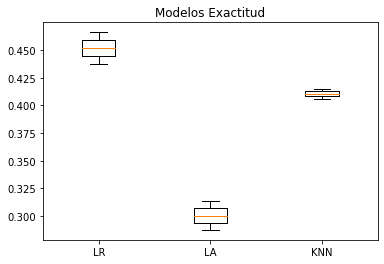

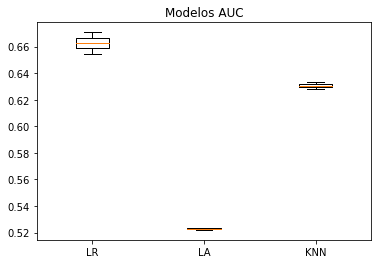

In [29]:
print('scoresLR')
print(np.mean(scoresLR['test_roc_auc_ovo']))
print(np.mean(scoresLR['test_accuracy']))
print('scoresLDA')
print(np.mean(scoresLDA['test_roc_auc_ovo']))
print(np.mean(scoresLDA['test_accuracy']))
print('scoresKNN')
print(np.mean(scoresKNN['test_roc_auc_ovo']))
print(np.mean(scoresKNN['test_accuracy']))


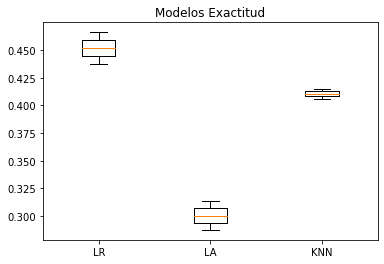

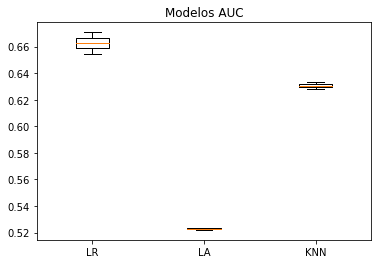

In [30]:
l=[scoresLR['test_accuracy'],scoresLDA['test_accuracy'],scoresKNN['test_accuracy']]
lN=['LR','LA','KNN']
boxPlotModelos(l,lN,'Modelos Exactitud')
l=[scoresLR['test_roc_auc_ovo'],scoresLDA['test_roc_auc_ovo'],scoresKNN['test_roc_auc_ovo']]
boxPlotModelos(l,lN,'Modelos AUC')

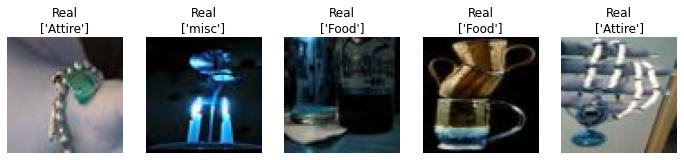

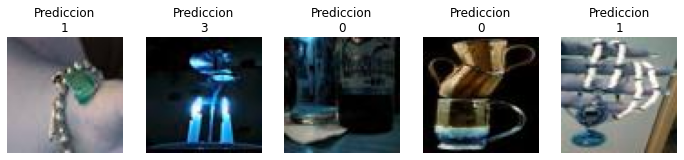

In [41]:
# Si se quiere realizar inferencia, es necesario entrenarla
#t_pred_LR = modelLR.predict(X_1D_norm)

# Sacar resultados de la inferencia
#Plot_Imagenes("Real"+"\n",t,X,5)
#Plot_Imagenes("Prediccion"+"\n",t_pred_LR,X,5)

In [42]:
# Report de clasificación para LR
#reportClassif(t_num, t_pred_LR)

Informe de evaluación del clasificador sobre el conjunto de test:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2278
           1       1.00      1.00      1.00      1691
           2       0.98      0.99      0.98       743
           3       1.00      1.00      1.00      1271

    accuracy                           1.00      5983
   macro avg       0.99      1.00      0.99      5983
weighted avg       1.00      1.00      1.00      5983



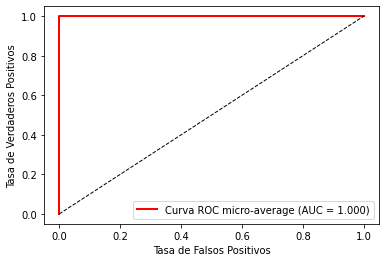

In [72]:
### Calculamos la Curva ROC y AUC general (usando micro-average):
#generalROCAUC(modelLR, t_pred_LR, X_1D_norm)

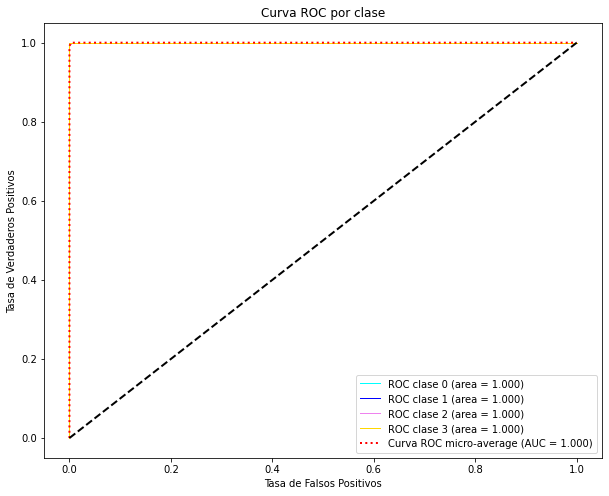

In [75]:
#Calculamos la Curva ROC y AUC por clases:
#classROCAUC(modelLR, t_pred_LR, X_1D_norm)

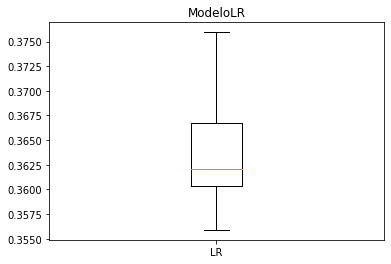

In [44]:
# Diagrama de cajas
#boxPlot(scoresLR, 'LR')

## SEGUNDA TÉCNICA: LINEAR DISCRIMINANT

In [24]:
CV = 5 # Por defecto 5-fold
scoring = ['precision_macro', 'recall_macro', 'precision_micro', 'recall_micro', 'f1_macro','accuracy']

modelLDA = LinearDiscriminantAnalysis()
modelLDA.fit(X_1D_norm, t_num.ravel())
scoresLDA = cross_validate(modelLDA, X_1D_norm, t_num, cv=CV, scoring=scoring, verbose=True)
print('Media del LDA : ', np.mean(scoresLDA['test_accuracy']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Media del LDA :  0.2966721430108158
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 15.8min finished


In [28]:
def ClassPredict (t_predict):
    Clases_pre=[]
    for i in t_pred_LDA:
        Clases_pre.append(Clases[i])
    return Clases_pre

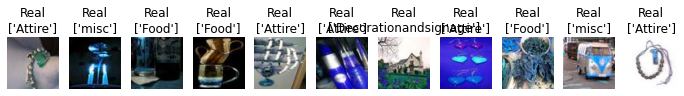

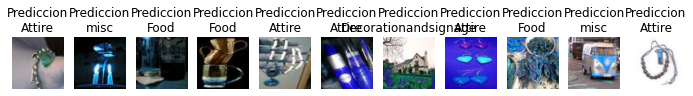

In [34]:
# Si se quiere realizar inferencia, es necesario entrenarla
t_pred_LDA = modelLDA.predict(X_1D_norm)

# Sacar resultados de la inferencia
Plot_Imagenes("Real"+"\n",t,X,11)
Plot_Imagenes("Prediccion"+"\n",ClassPredict(t_pred_LDA),X,11)

In [35]:
# Report de clasificación para LDA
reportClassif(t_num, t_pred_LDA)

Informe de evaluación del clasificador sobre el conjunto de test:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2278
           1       1.00      1.00      1.00      1691
           2       0.97      1.00      0.98       743
           3       1.00      1.00      1.00      1271

    accuracy                           1.00      5983
   macro avg       0.99      1.00      0.99      5983
weighted avg       1.00      1.00      1.00      5983



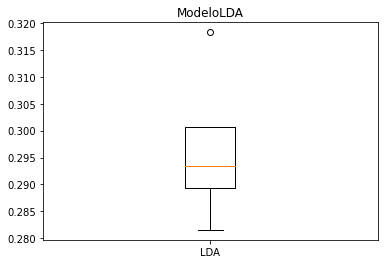

In [36]:
# Diagrama de cajas
boxPlot(scoresLDA, 'LDA')

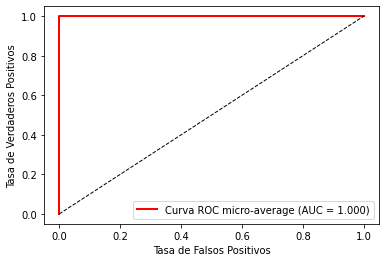

In [40]:
### Calculamos la Curva ROC y AUC general (usando micro-average):
generalROCAUC(modelLDA, t_pred_LDA, X_1D_norm)

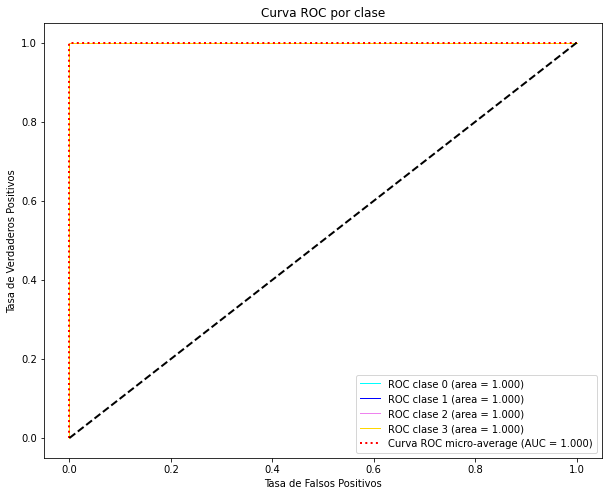

In [41]:
#Calculamos la Curva ROC y AUC por clases:
classROCAUC(modelLDA, t_pred_LDA, X_1D_norm)

In [ ]:
## TERCERA TÉCNICA: K-NEARESTNEIGHBOURS

In [85]:
neighbours = 200
modelKNN = KNeighborsClassifier(n_neighbors=neighbours)
modelKNN.fit(X_1D_norm, t_num.ravel())
scoresKNN = cross_validate(modelKNN, X_1D_norm, t_num, cv=CV, scoring=scoring, verbose=True)
print('Media del KNN : ', np.mean(scoresKNN['test_accuracy']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Media del KNN :  0.44392349323699437
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 16.9min finished


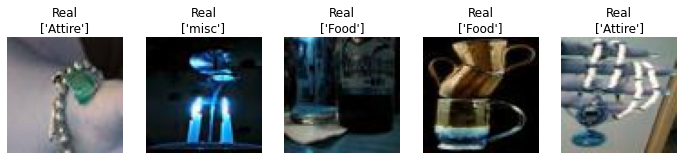

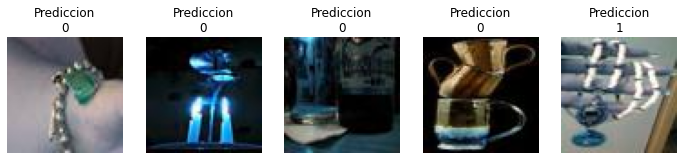

In [86]:
# Si se quiere realizar inferencia, es necesario entrenarla
t_pred_KNN = modelKNN.predict(X_1D_norm)

# Sacar resultados de la inferencia
Plot_Imagenes("Real"+"\n",t,X,5)
Plot_Imagenes("Prediccion"+"\n",t_pred_KNN,X,5)

In [42]:
# Report de clasificación para KNN
reportClassif(t_num, t_pred_KNN)

Informe de evaluación del clasificador sobre el conjunto de test:
               precision    recall  f1-score   support

           0       0.53      0.60      0.56      2278
           1       0.38      0.64      0.47      1691
           2       0.57      0.25      0.35       743
           3       0.47      0.07      0.13      1271

    accuracy                           0.46      5983
   macro avg       0.49      0.39      0.38      5983
weighted avg       0.48      0.46      0.42      5983



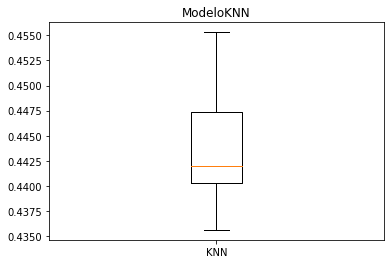

In [43]:
# Diagrama de cajas
boxPlot(scoresKNN, 'KNN')

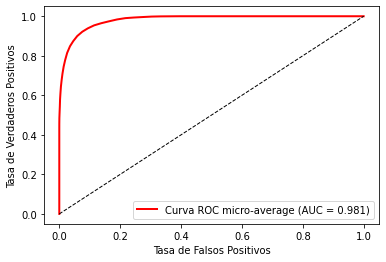

In [44]:
### Calculamos la Curva ROC y AUC general (usando micro-average):
generalROCAUC(modelKNN, t_pred_KNN, X_1D_norm)

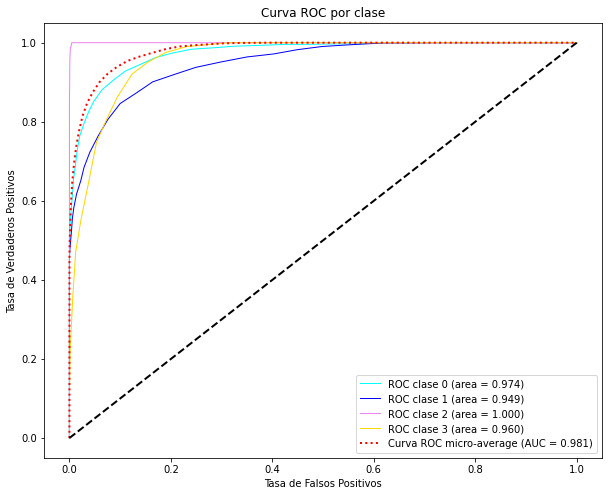

In [45]:
#Calculamos la Curva ROC y AUC por clases:
classROCAUC(modelKNN, t_pred_KNN, X_1D_norm)

In [46]:
## CUARTA TÉCNICA: RED NEURONAL DESDE KERAS

In [30]:
def From_3D_to_3Dnorm(Entrada):
    try:
        n_samples = len(Entrada)  #Obtenemos el número de imágenes totales en el conjunto de datos
        X_Train_Matriz=np.array(Entrada)/255.0 #Convertimos la lista 
    except:
         print("Error in funtion : From_3D_to_3Dnorm(Entrada,)")
         return 0
    return X_Train_Matriz


In [31]:
k_folds = 10
k_fold_reps = 2 #no hace falta
epochs = 2
batch_size = 200
lr = 0.001
 
# Creamos el objeto del modelo de red neuronal multicapa.
def conv_model(lr, metrics):
    modelDL = models.Sequential()
    modelDL.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    modelDL.add(layers.MaxPooling2D((2, 2)))
    modelDL.add(layers.Conv2D(64, (3, 3), activation='relu'))
    modelDL.add(layers.MaxPooling2D((2, 2)))
    modelDL.add(layers.Conv2D(64, (3, 3), activation='relu'))
    modelDL.add(layers.Flatten())
    modelDL.add(layers.Dense(64, activation='relu'))
    modelDL.add(layers.Dense(4, activation='softmax'))
    modelDL.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=lr), metrics=metrics)  
    modelDL.summary()
    return modelDL
 

Entrenamiento del modelo de red de neuronas con validación cruzada:

In [32]:
def f1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.
        Only computes a batch-wise average of recall.
        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
    def precision(y_true, y_pred):
        """Precision metric.
        Only computes a batch-wise average of precision.
        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [33]:
#Se recodifica la variable de salida (clases) mediante 4 variables binarias, ya que son 4 clases:
metrics = ['accuracy','AUC','Recall','Precision', f1_score]
n_classes =  len(np.unique(t))
results = pd.DataFrame(columns=metrics)  
 
X_3Dnorm = From_3D_to_3Dnorm(X)

In [27]:
 # Se genera una K-fold estratificada
rkf = RepeatedStratifiedKFold(n_splits=k_folds, n_repeats=k_fold_reps, random_state=42) 
 
# Se realizan tantos entrenamientos como valor de se indica en la validación cruzada
for i, (train_index, test_index) in enumerate(rkf.split(X_3Dnorm, t_num)):
    # Muestra el paso de la k-fold en la que nos encontramos
    print('k_fold', i+1, 'de', k_folds*k_fold_reps)
 
    # Se categorizan las clases de salida
    t_cat = keras.utils.to_categorical(t_num, num_classes=n_classes)
 
    # Se obtienen los paquetes de datos de entrenamiento y test en base a los índices aleatorios generados en la k-fold
    X_train, t_train = X_3Dnorm[train_index], t_cat[train_index]
    X_test, t_test = X_3Dnorm[test_index], t_cat[test_index]
 
    # Se carga el modelo en cada paso de la kfold para resetear el entrenamiento (pesos)
    model = conv_model(lr, metrics)
 
    # Se realiza el entrenamiento de la red de neuronas
    history = model.fit(X_train, t_train, validation_data=(X_test, t_test), epochs=epochs, batch_size=batch_size, verbose=True)
 
    # Se añade una línea en la tabla de resultados (dataframe de pandas) con los resultados de las métricas seleccionadas
    results.loc[i] = model.evaluate(X_test, t_test, batch_size=None)[1:]  # Se descarta la métrica 0 porque es el valor de la función de error

  
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                589888    
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 260       
Total params: 646,468
Trainable params: 646,468
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
27/27 [==============================] - 19s 667ms/step - loss: 1.3170 - accuracy: 0.3557 - auc: 0.6323 - recall: 0.0331 - precision: 0.4089 - val_loss: 1.2085 - val_accuracy: 0.4247 - val_

KeyboardInterrupt: 

Contraste de hipótesis: Primero se muestran los resultados obtenidos aplicando el test de Kruskall-Wallis y el test de Anova. Si se rechaza la hipótesis, entonces se puede afirmar que los modelos son diferentes y, posteriormente, se aplican dos test de comparación múltiple mediante el uso de la clase MultiComparison. Estos métodos comprueban si hay diferencias significativas con un p<0.05, corrigiendo el hecho de que se están haciendo múltiples comparaciones que normalmente aumentarían la probabilidad de que se identifique una diferencia significativa. Un resultado de "reject = true" significa que se ha observado una diferencia significativa:

Método de Tukey. Se emplea para ello la función tukeyhsd. Método de Holm-Bonferroni. Se emplea para ello la función allpairtest

In [4]:
alpha = 0.05
F_statistic, pVal = stats.kruskal(scoresLR['test_accuracy'], scoresLDA['test_accuracy'], scoresKNN['test_accuracy'])
F_statistic2, pVal2 = stats.f_oneway(scoresLR['test_accuracy'], scoresLDA['test_accuracy'], scoresKNN['test_accuracy'])
print ('p-valor KrusW:', pVal)
print ('p-valor ANOVA:', pVal2)
if pVal <= alpha:
    print('Rechazamos la hipótesis: los modelos son diferentes\n')
    stacked_data = np.vstack((scoresLR['test_accuracy'],scoresLDA['test_accuracy'],scoresKNN['test_accuracy'])).ravel()
    stacked_model = np.vstack((np.repeat('modelLR',CV),np.repeat('modelLDA',CV),np.repeat('modelKNN',CV))).ravel()    
    MultiComp = MultiComparison(stacked_data, stacked_model)
    comp = MultiComp.allpairtest(stats.ttest_rel, method='Holm')
    print (comp[0])    
    print(MultiComp.tukeyhsd(alpha=0.05))
else:
    print('Aceptamos la hipótesis: los modelos son iguales')

NameError: name 'scoresLR' is not defined